<a href="https://colab.research.google.com/github/soldatsm/Base_of_chemoinformatics/blob/master/HW2_chemoinf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача - определить является ли вещество агрегатором 

# Часть 0. Установка библиотек

In [ ]:
!pip install --pre deepchem


     |████████████████████████████████| 609 kB 2.1 MB/s 
     |████████████████████████████████| 20.6 MB 1.3 MB/s 


In [1]:
pip install rdkit-pypi

     |████████████████████████████████| 20.6 MB 1.2 MB/s 


In [76]:
import rdkit

In [77]:
rdkit.__version__

'2021.09.2'

In [ ]:
import deepchem
deepchem.__version__

'2.6.0.dev'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd


# Часть 1 Чтение таблиц, создание SDF и его валидация

In [78]:
test_DLS_df = pd.read_csv("/content/drive/MyDrive/test_DLS (2).csv")

In [ ]:
test_DLS_df.head()

,ID,Smiles String,agg?
0,5100051,O=C1NC(=S)NC(=O)C1=C/C=C/C=C/c1c(O)[nH]c(=S)[n...,0
1,5105335,C/C(=N/NC(=O)NC1=CCCC=C1)c1cccc(-c2ccccc2)c1,1
2,5110569,CC(C)CN(CC(C)C)CP(=S)(CN(CC(C)C)CC(C)C)CN(CC(C...,1
3,5114506,C1CSC2(N1)C1CC3CC(C1)CC2C3.Cl,0
4,5128360,Nc1ccc(Sc2ccc(Cc3ccc(Sc4ccc(N)cc4)cc3)cc2)cc1,1


In [79]:
SCAMS_df = pd.read_csv("/content/drive/MyDrive/SCAMS.csv")

In [ ]:
SCAMS_df.shape

(916, 4)

In [ ]:
SCAMS_df.head(10)

,Unnamed: 0,Smiles String,ID,agg?
0,0,FC(F)(F)S(=O)(=O)c1ccc(cc1)S(=O)(=O)C(F)(F)F,0195-0009,0
1,1,N\N=C/1\C(=O)N(CC(=O)Nc2ccccc2)c3ccccc13,0784-0296,0
2,2,COc1ccc2O\C(=N\NC(=O)c3ccc(Br)cc3)\C(=Cc2c1)C(...,1612-0974,0
3,3,COc1ccc2C=C(C(=O)Oc2c1)c3nnc(N)s3,1711-1412,0
4,4,COc1cccc(OC)c1C(=O)NC2=C(C)N(C)N(C2=O)c3ccccc3,2134-0382,0
5,5,COc1ccc(cc1OC)C2N(Cc3ccccc3)C(=O)C(=C2C(=O)C)O,3141-0125,0
6,6,CCN(CC)c1ccc(\C=N/NC(=O)CN2CCN(Cc3ccccc3)CC2)c...,3254-2314,0
7,7,Fc1ccc(cc1)C(=O)N2CCN(Cc3ccc4ccccc4c3)CC2,3381-0333,0
8,8,Nc1ccc(cc1)C2(c3ccc(N)cc3)c4ccccc4c5ccccc25,0384-0038,1
9,9,CCOC(=O)C1C(CN(C(=O)c2ccc(OC)cc2)C1=O)c3ccccc3,0908-0049,0


In [80]:
from rdkit.Chem import PandasTools

In [81]:
from rdkit import Chem

In [82]:
SCAMS_df["Mols"] = [Chem.MolFromSmiles(i) for i in SCAMS_df["Smiles String"]]

In [ ]:
SCAMS_df.head()

,Unnamed: 0,Smiles String,ID,agg?,Mols
0,0,FC(F)(F)S(=O)(=O)c1ccc(cc1)S(=O)(=O)C(F)(F)F,0195-0009,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,1,N\N=C/1\C(=O)N(CC(=O)Nc2ccccc2)c3ccccc13,0784-0296,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,2,COc1ccc2O\C(=N\NC(=O)c3ccc(Br)cc3)\C(=Cc2c1)C(...,1612-0974,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,3,COc1ccc2C=C(C(=O)Oc2c1)c3nnc(N)s3,1711-1412,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,4,COc1cccc(OC)c1C(=O)NC2=C(C)N(C)N(C2=O)c3ccccc3,2134-0382,0,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [ ]:
PandasTools.WriteSDF(SCAMS_df,"SCAMS_sdf.sdf", molColName="Mols")

In [ ]:
#PandasTools.LoadSDF("/content/SCAMS_sdf.sdf")

Для валидации был использован http://chemsar.scbdd.com/tools/mol_validate/

In [83]:
validated_SCAMS = pd.read_csv("/content/drive/MyDrive/temp_file-AnonymousUser20211111192407.csv")

In [ ]:
print(validated_SCAMS)

     Unnamed: 0  ...                                         Validation
0             0  ...  <span class="btn-success"><i class="icon-check...
1             1  ...  <span class="btn-success"><i class="icon-check...
2             2  ...  <span class="btn-success"><i class="icon-check...
3             3  ...  <span class="btn-success"><i class="icon-check...
4             4  ...  <span class="btn-success"><i class="icon-check...
..          ...  ...                                                ...
911         911  ...  <span class="btn-success"><i class="icon-check...
912         912  ...  <span class="btn-success"><i class="icon-check...
913         913  ...  <span class="btn-success"><i class="icon-check...
914         914  ...  <span class="btn-success"><i class="icon-check...
915         915  ...  <span class="btn-success"><i class="icon-check...

[916 rows x 3 columns]


In [84]:
 validated_SCAMS[validated_SCAMS.Validation != """<span class="btn-success"><i class="icon-check-alt"></i> Success</span>"""] #Не прошедшие валидацию

,Unnamed: 0,ROMol,Validation
97,97,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."
254,254,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."
451,451,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."
459,459,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."
470,470,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."
472,472,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."
474,474,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."
476,476,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."
516,516,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<span class=""btn-info""><i class="" icon-info-4""..."


In [85]:
new_SCAMS = SCAMS_df[validated_SCAMS.Validation == """<span class="btn-success"><i class="icon-check-alt"></i> Success</span>"""] #Удаление из df не прошедших валидацию

In [ ]:
new_SCAMS

,Unnamed: 0,Smiles String,ID,agg?
0,0,FC(F)(F)S(=O)(=O)c1ccc(cc1)S(=O)(=O)C(F)(F)F,0195-0009,0
1,1,N\N=C/1\C(=O)N(CC(=O)Nc2ccccc2)c3ccccc13,0784-0296,0
2,2,COc1ccc2O\C(=N\NC(=O)c3ccc(Br)cc3)\C(=Cc2c1)C(...,1612-0974,0
3,3,COc1ccc2C=C(C(=O)Oc2c1)c3nnc(N)s3,1711-1412,0
4,4,COc1cccc(OC)c1C(=O)NC2=C(C)N(C)N(C2=O)c3ccccc3,2134-0382,0
...,...,...,...,...
911,911,CN1C(=O)c2cc(sc2c3ccccc13)C(=O)N4CCN(CC4)c5ccc...,C498-0650,0
912,912,CCCCNC(=O)CCCCCN1C(=S)Nc2cc3OCOc3cc2C1=O,K284-5135,0
913,913,CC1CCCC(C)N1CCCNC(=O)C2N(Cc3ccc(C)cc3)C(=O)c4c...,K786-1357,0
914,914,CCC(C)N1CC(CC1=O)C(=O)NC2CCCCC2,K786-9819,0


In [86]:
new_SCAMS = new_SCAMS.reset_index().drop(["index"], axis=1) #Исправление индекса

In [87]:
new_SCAMS["Unnamed: 0"] = new_SCAMS.index

In [88]:
new_SCAMS.head(10)

,Unnamed: 0,Smiles String,ID,agg?,Mols
0,0,FC(F)(F)S(=O)(=O)c1ccc(cc1)S(=O)(=O)C(F)(F)F,0195-0009,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,1,N\N=C/1\C(=O)N(CC(=O)Nc2ccccc2)c3ccccc13,0784-0296,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,2,COc1ccc2O\C(=N\NC(=O)c3ccc(Br)cc3)\C(=Cc2c1)C(...,1612-0974,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,3,COc1ccc2C=C(C(=O)Oc2c1)c3nnc(N)s3,1711-1412,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,4,COc1cccc(OC)c1C(=O)NC2=C(C)N(C)N(C2=O)c3ccccc3,2134-0382,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
5,5,COc1ccc(cc1OC)C2N(Cc3ccccc3)C(=O)C(=C2C(=O)C)O,3141-0125,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
6,6,CCN(CC)c1ccc(\C=N/NC(=O)CN2CCN(Cc3ccccc3)CC2)c...,3254-2314,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
7,7,Fc1ccc(cc1)C(=O)N2CCN(Cc3ccc4ccccc4c3)CC2,3381-0333,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
8,8,Nc1ccc(cc1)C2(c3ccc(N)cc3)c4ccccc4c5ccccc25,0384-0038,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
9,9,CCOC(=O)C1C(CN(C(=O)c2ccc(OC)cc2)C1=O)c3ccccc3,0908-0049,0,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [89]:
new_SCAMS.shape

(907, 5)

In [90]:
SCAMS_df.shape

(916, 5)

In [91]:
not_val = SCAMS_df[validated_SCAMS.Validation != """<span class="btn-success"><i class="icon-check-alt"></i> Success</span>"""]

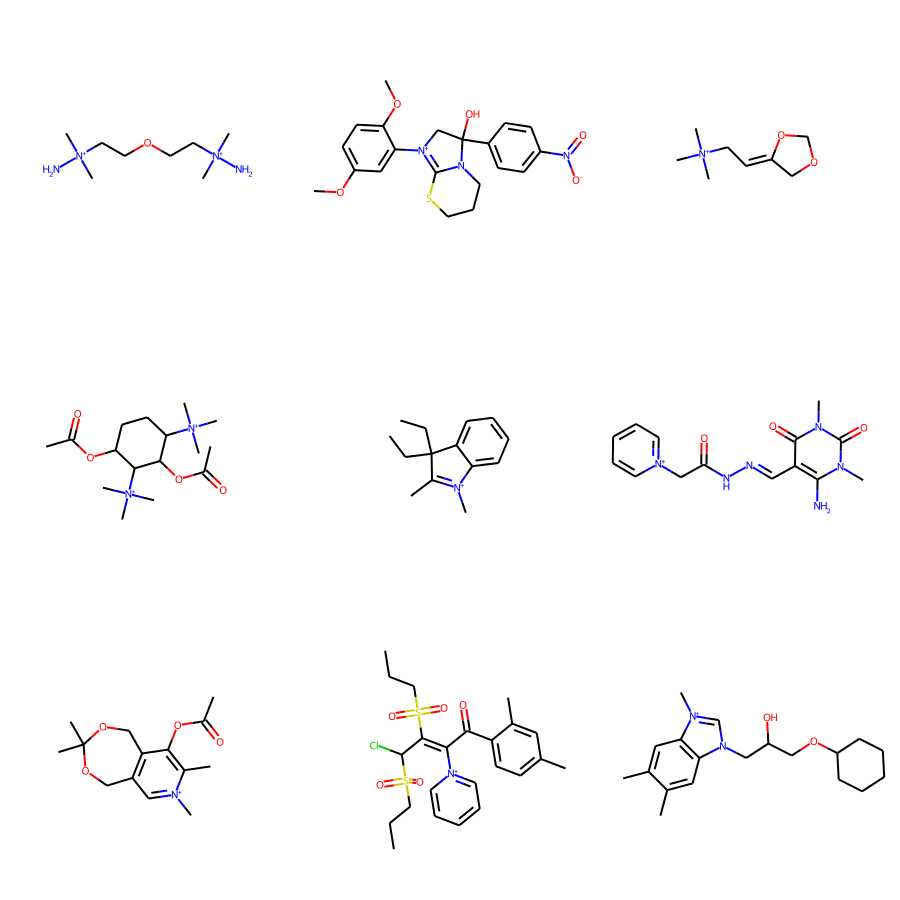

In [92]:
Chem.Draw.MolsToGridImage(not_val.Mols, subImgSize=(300,300), molsPerRow=3) 

# Часть 2. Установить sklearn, CatBoost, XGBoost, LightGBM.

In [25]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 21 kB/s 


In [26]:
!pip install xgboost

In [27]:
!pip install lightgbm

In [93]:
import sklearn
import catboost
import lightgbm
import xgboost
print(sklearn.__version__, catboost.__version__,lightgbm.__version__,xgboost.__version__, sep="\n")

0.22.2.post1
1.0.3
2.2.3
0.90


# Часть 3.  10-fold cross-validation 
Файл SCAMS.csv использовать в 10-fold cross-validation (тут эти части будут называться train and validation). Использовать всю выборку test_DLS.csv в качестве тестовой

Мне кажется что мадель будет лучше обучатся на основании дискрипторов чем на смайлзах по этому:

In [94]:
from rdkit.Chem import MACCSkeys
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen

In [95]:
new_SCAMS["Mol"] = [Chem.MolFromSmiles(i) for i in new_SCAMS["Smiles String"]]
Mol_LogP = [Crippen.MolLogP(i) for i  in new_SCAMS["Mol"]]
Mol_Weith = [Crippen.MolMR(i) for i  in new_SCAMS["Mol"]]
Rotable_Bonds = [Descriptors.NumRotatableBonds(i) for i in new_SCAMS["Mol"]]

In [96]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [97]:
desc_AromaticAtoms = [AromaticAtoms(i) for i in new_SCAMS["Mol"]]
Heavy_atom = [Descriptors.HeavyAtomCount(i) for i in new_SCAMS["Mol"]]
desc_AromaticProportion = [AromaticAtoms(i)/Descriptors.HeavyAtomCount(i) for i in new_SCAMS["Mol"]]

In [98]:
Descript = pd.DataFrame({"Mol_LogP":pd.Series(Mol_LogP),
                         "Mol_Weith":pd.Series(Mol_Weith),
                         "Rotable_Bonds":pd.Series(Rotable_Bonds),
                         "desc_AromaticAtoms":pd.Series(desc_AromaticAtoms),
                         "Heavy_atom":pd.Series(Heavy_atom),
                         "desc_AromaticProportion": pd.Series(desc_AromaticProportion)})

In [99]:
Descript

,Mol_LogP,Mol_Weith,Rotable_Bonds,desc_AromaticAtoms,Heavy_atom,desc_AromaticProportion
0,2.27360,52.9236,2,6,20,0.300000
1,1.33470,84.5911,3,12,22,0.545455
2,2.54850,98.4551,4,16,26,0.615385
3,1.90230,72.3514,2,15,19,0.789474
4,2.75392,103.2462,5,17,27,0.629630
...,...,...,...,...,...,...
902,4.36900,124.1405,2,19,30,0.633333
903,3.26449,105.9014,9,10,27,0.370370
904,4.46132,127.3432,7,12,32,0.375000
905,2.08230,74.5887,4,0,19,0.000000


In [100]:
new_SCAMS["MorganFP"] = [AllChem.GetMorganFingerprintAsBitVect(i, 2) for i in new_SCAMS["Mol"]]

In [ ]:
from rdkit import DataStructs

In [ ]:
import numpy as np

In [197]:
##Conver RDkit vector to np array
"""
np_fps = []
for fp in new_SCAMS["MorganFP"]:
  arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  np_fps.append(arr)
  """

'\nnp_fps = []\nfor fp in new_SCAMS["MorganFP"]:\n  arr = np.zeros((1,))\n  DataStructs.ConvertToNumpyArray(fp, arr)\n  np_fps.append(arr)\n  '

In [ ]:
#print(new_SCAMS["MorganFP"])

0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                             ...                        
902    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
903    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
904    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
905    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
906    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
Name: MorganFP, Length: 907, dtype: object


In [196]:
#ML_SCAMS = pd.DataFrame({"AGG": new_SCAMS["agg?"],
 #                          "MORGAN_FP": np_fps})

In [101]:
ML_SCAMS = pd.DataFrame({"AGG": new_SCAMS["agg?"]})

In [102]:
ML_SCAMS 

,AGG
0,0
1,0
2,0
3,0
4,0
...,...
902,0
903,0
904,0
905,0


In [103]:
ML_SCAMS_2 = pd.concat([ML_SCAMS, Descript], axis=1)

In [198]:
#ML_SCAMS_2["MORGAN_FP"] = ML_SCAMS_2["MORGAN_FP"].to_a()

In [104]:
ML_SCAMS_2 # Как мне кажется такое представлени исходных данных удачно подходит для МЛ и возможно что-то даже будет предсказано

,AGG,Mol_LogP,Mol_Weith,Rotable_Bonds,desc_AromaticAtoms,Heavy_atom,desc_AromaticProportion
0,0,2.27360,52.9236,2,6,20,0.300000
1,0,1.33470,84.5911,3,12,22,0.545455
2,0,2.54850,98.4551,4,16,26,0.615385
3,0,1.90230,72.3514,2,15,19,0.789474
4,0,2.75392,103.2462,5,17,27,0.629630
...,...,...,...,...,...,...,...
902,0,4.36900,124.1405,2,19,30,0.633333
903,0,3.26449,105.9014,9,10,27,0.370370
904,0,4.46132,127.3432,7,12,32,0.375000
905,0,2.08230,74.5887,4,0,19,0.000000


## test_DLS processing

In [105]:
test_DLS_df

,ID,Smiles String,agg?
0,5100051,O=C1NC(=S)NC(=O)C1=C/C=C/C=C/c1c(O)[nH]c(=S)[n...,0
1,5105335,C/C(=N/NC(=O)NC1=CCCC=C1)c1cccc(-c2ccccc2)c1,1
2,5110569,CC(C)CN(CC(C)C)CP(=S)(CN(CC(C)C)CC(C)C)CN(CC(C...,1
3,5114506,C1CSC2(N1)C1CC3CC(C1)CC2C3.Cl,0
4,5128360,Nc1ccc(Sc2ccc(Cc3ccc(Sc4ccc(N)cc4)cc3)cc2)cc1,1
...,...,...,...
59,5469576,CC1(C)CC(NC2C3CC4CC(C3)CC2C4)CC(C)(C)N1.Cl.Cl,0
60,5725697,C=CC1Oc2c(cc(C(C)(C)C)cc2C(C)(C)C)NC12C=C(C(C)...,1
61,6258408,COc1ccc(-c2nc3cc(NC(=O)c4sc5ccccc5c4Cl)ccc3o2)cc1,1
62,7724340,Ic1ccc(CSc2nnc[nH]2)cc1,1


In [106]:
m = [Chem.MolFromSmiles(i) for i in test_DLS_df["Smiles String"]]
Mol_LogP_m = [Crippen.MolLogP(i) for i  in m]
Mol_Weith_m = [Crippen.MolMR(i) for i  in m]
Rotable_Bonds_m = [Descriptors.NumRotatableBonds(i) for i in m]
desc_AromaticAtoms_m = [AromaticAtoms(i) for i in m]
Heavy_atom_m = [Descriptors.HeavyAtomCount(i) for i in m]
desc_AromaticProportion_m = [AromaticAtoms(i)/Descriptors.HeavyAtomCount(i) for i in m]


In [107]:
  DLS_X_test_set = pd.DataFrame({"Mol_LogP" : pd.Series(Mol_LogP_m),
                             "Mol_Weith" : pd.Series(Mol_Weith_m),
                             "Rotable_Bonds" : pd.Series(Rotable_Bonds_m),
                             "desc_AromaticAtoms" : pd.Series(desc_AromaticAtoms_m),
                             "Heavy_atom" : pd.Series(Heavy_atom_m),
                             "desc_AromaticProportion" : pd.Series(desc_AromaticProportion_m)})

In [108]:
DLS_X_test_set

,Mol_LogP,Mol_Weith,Rotable_Bonds,desc_AromaticAtoms,Heavy_atom,desc_AromaticProportion
0,0.16479,89.0526,3,6,23,0.260870
1,4.61070,102.2134,4,12,25,0.480000
2,7.18040,152.6330,18,0,32,0.000000
3,2.89700,67.4847,0,0,15,0.000000
4,6.74420,125.6448,6,24,29,0.827586
...,...,...,...,...,...,...
59,4.55350,102.7804,2,0,23,0.000000
60,7.90700,144.8917,1,6,34,0.176471
61,6.62380,120.7852,4,24,30,0.800000
62,2.70160,65.1027,3,11,14,0.785714


## КроссВалидация 10-fold

In [109]:
X_set = ML_SCAMS_2.loc[:,["Mol_LogP",	"Mol_Weith",	"Rotable_Bonds",	"desc_AromaticAtoms",	"Heavy_atom",	"desc_AromaticProportion"]]

In [110]:
Y_set = ML_SCAMS_2.loc[:,"AGG"]

In [111]:
from sklearn.model_selection import StratifiedKFold


In [112]:
skf = StratifiedKFold(n_splits=10)

In [55]:
fold_no =0
for train_index, test_index in skf.split(X_set, Y_set):
  X_train, Y_train = X_set.loc[train_index], Y_set.loc[train_index]
  X_test, Y_test = X_set.loc[test_index], Y_set.loc[test_index]
  fold_no += 1

# Часть 4. Обучение моделей
Обучить хотя бы одну модель из каждого пакета выше. Посчитать ROC-AUC lower confidence interval, ROC-AUC, ROC-AUC upper confidence interval, MCC, Accuracy, F1 в ходе 10-fold crossvalidation и выбрать лучшую модель для каждого пакета. Сохранить все значения и построить для violin-plot (группировка по метрикам, затем название каждой модели) по результатам 10- fold cross-validation. Затем построить radar-chart для лучших моделей.

## Random_forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [115]:
import matplotlib.pyplot as plt


In [116]:
rf = RandomForestClassifier(n_estimators=100, random_state=1123)

RandomForestClassifier: ROC AUC=0.895
RandomForestClassifier: F1 Score=0.550
RandomForestClassifier: ROC AUC=0.770
RandomForestClassifier: F1 Score=0.308
RandomForestClassifier: ROC AUC=0.738
RandomForestClassifier: F1 Score=0.455
RandomForestClassifier: ROC AUC=0.753
RandomForestClassifier: F1 Score=0.533
RandomForestClassifier: ROC AUC=0.763
RandomForestClassifier: F1 Score=0.520
RandomForestClassifier: ROC AUC=0.737
RandomForestClassifier: F1 Score=0.391
RandomForestClassifier: ROC AUC=0.701
RandomForestClassifier: F1 Score=0.535
RandomForestClassifier: ROC AUC=0.747
RandomForestClassifier: F1 Score=0.508
RandomForestClassifier: ROC AUC=0.846
RandomForestClassifier: F1 Score=0.400
RandomForestClassifier: ROC AUC=0.789
RandomForestClassifier: F1 Score=0.444


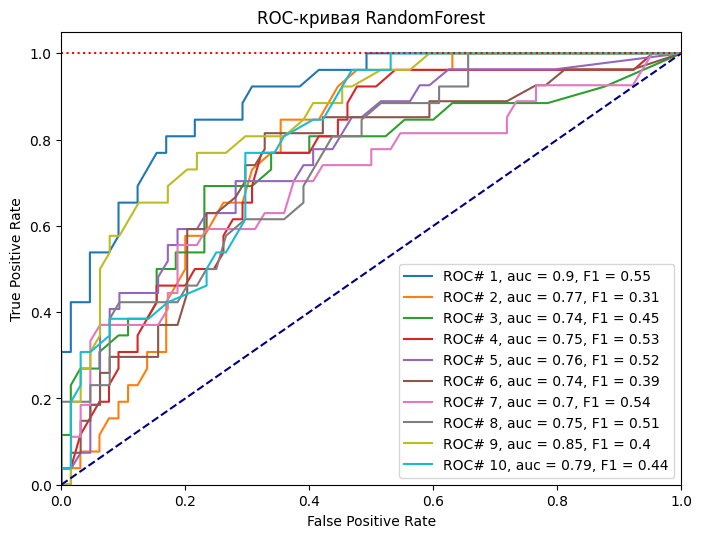

In [176]:
fold_no =0
fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls = []

for train_index, test_index in skf.split(X_set, Y_set):
  X_train, Y_train = X_set.loc[train_index], Y_set.loc[train_index]
  X_test, Y_test = X_set.loc[test_index], Y_set.loc[test_index]
  rf.fit(X_train, Y_train)

  lr_probs = rf.predict_proba(X_test)
  lr_probs = lr_probs[:, 1]
  lr_auc= roc_auc_score(Y_test, lr_probs)
  F_1 = f1_score(Y_test, rf.predict(X_test))
  print('RandomForestClassifier: ROC AUC=%.3f' % (lr_auc))
  print('RandomForestClassifier: F1 Score=%.3f' % (F_1))
  fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
  roc_auc = auc(fpr, tpr)

  fpr_ls.append(fpr)
  tpr_ls.append(tpr)
  auc_ls.append(roc_auc)
  F_1_ls.append(F_1)
num = 1
plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls ):
  plt.plot(i, j,
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")

  num +=1
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая RandomForest')
plt.legend(loc="lower right")
plt.show()

RandomForestClassifier: ROC AUC=0.768
RandomForestClassifier: F1 Score=0.444


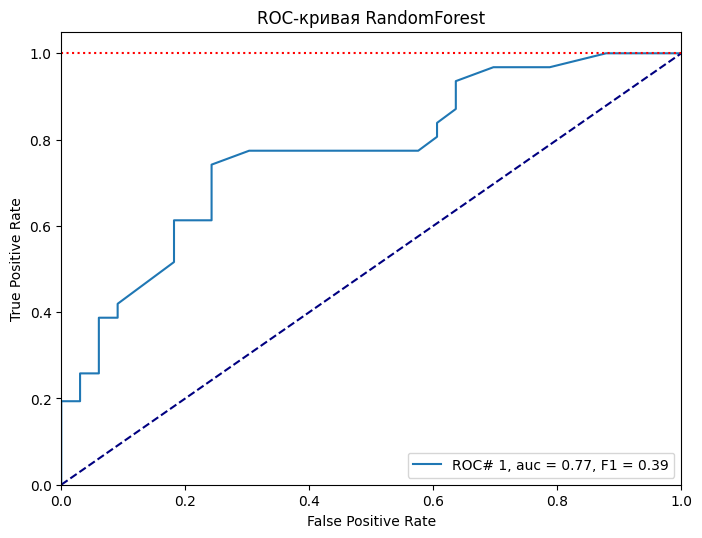

In [177]:
#Оценка по дата сету test_DLS
fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls = []
lr_probs = rf.predict_proba(DLS_X_test_set)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(test_DLS_df["agg?"], lr_probs)
print('RandomForestClassifier: ROC AUC=%.3f' % (lr_auc))
print('RandomForestClassifier: F1 Score=%.3f' % (F_1))
F_1 = f1_score(test_DLS_df["agg?"], rf.predict(DLS_X_test_set))
fpr, tpr, treshold = roc_curve(test_DLS_df["agg?"], lr_probs)
roc_auc = auc(fpr, tpr)
fpr_ls.append(fpr)
tpr_ls.append(tpr)
auc_ls.append(roc_auc)
F_1_ls.append(F_1)
num = 1

plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая RandomForest')
plt.legend(loc="lower right")
plt.show()

## Extra_tree

In [146]:
from sklearn.ensemble import ExtraTreesClassifier

In [147]:
etc = ExtraTreesClassifier()

ExtraTreesClassifier: ROC AUC=0.853
ExtraTreesClassifier: ROC AUC=0.738
ExtraTreesClassifier: ROC AUC=0.709
ExtraTreesClassifier: ROC AUC=0.728
ExtraTreesClassifier: ROC AUC=0.771
ExtraTreesClassifier: ROC AUC=0.715
ExtraTreesClassifier: ROC AUC=0.688
ExtraTreesClassifier: ROC AUC=0.708
ExtraTreesClassifier: ROC AUC=0.824
ExtraTreesClassifier: ROC AUC=0.814


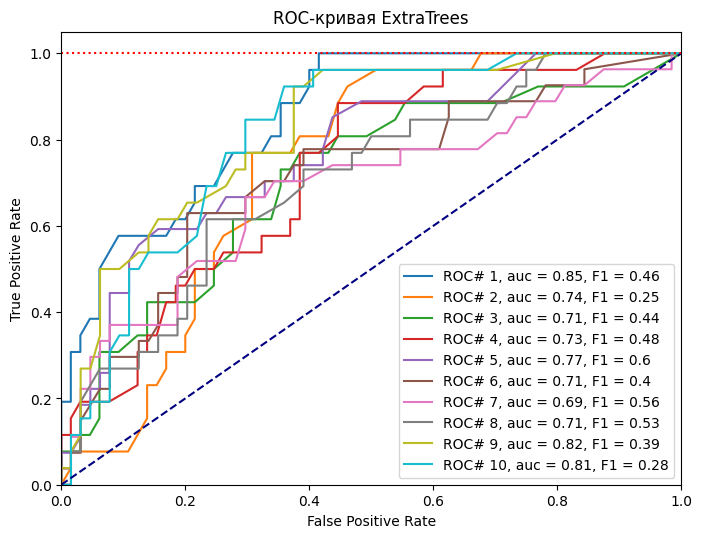

In [178]:

fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls = []

for train_index, test_index in skf.split(X_set, Y_set):
  X_train, Y_train = X_set.loc[train_index], Y_set.loc[train_index]
  X_test, Y_test = X_set.loc[test_index], Y_set.loc[test_index]
  etc.fit(X_train, Y_train)

  lr_probs = etc.predict_proba(X_test)
  lr_probs = lr_probs[:, 1]
  lr_auc = roc_auc_score(Y_test, lr_probs)
  print('ExtraTreesClassifier: ROC AUC=%.3f' % (lr_auc))
  fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
  roc_auc = auc(fpr, tpr)
  F_1 = f1_score(Y_test, etc.predict(X_test))

  fpr_ls.append(fpr)
  tpr_ls.append(tpr)
  auc_ls.append(roc_auc)
  F_1_ls.append(F_1)

num = 1
plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая ExtraTrees')
plt.legend(loc="lower right")
plt.show()

ExtraTreesClassifier: ROC AUC=0.791


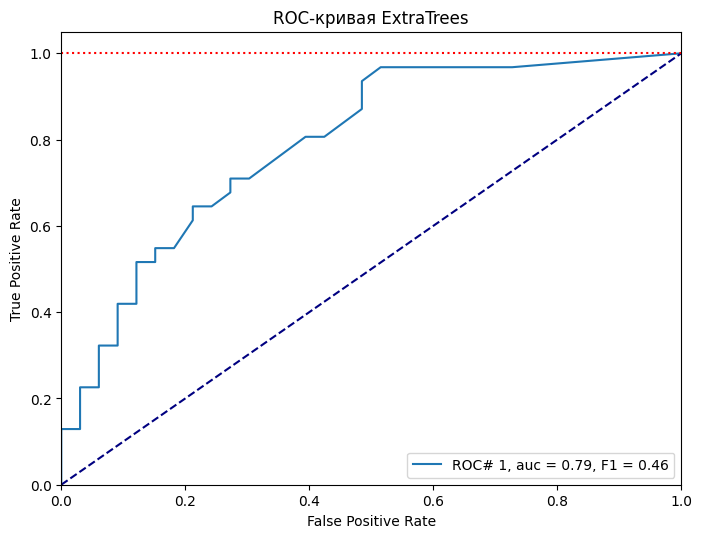

In [179]:
#Оценка по дата сету test_DLS
fpr_ls = []
tpr_ls = []
auc_ls = []
F1_ls = []

lr_probs = etc.predict_proba(DLS_X_test_set)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(test_DLS_df["agg?"], lr_probs)
print('ExtraTreesClassifier: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(test_DLS_df["agg?"], lr_probs)
roc_auc = auc(fpr, tpr)
F_1 = f1_score(test_DLS_df["agg?"], etc.predict(DLS_X_test_set))

fpr_ls.append(fpr)
tpr_ls.append(tpr)
auc_ls.append(roc_auc)
F1_ls.append(F_1)

num = 1

plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая ExtraTrees')
plt.legend(loc="lower right")
plt.show()

## CatBoos calassifier

In [173]:
from catboost import CatBoostClassifier

In [174]:
cat = CatBoostClassifier()

Выходные данные были обрезаны до нескольких последних строк (5000).
4:	learn: 0.6674759	total: 8.99ms	remaining: 1.79s
5:	learn: 0.6630453	total: 11ms	remaining: 1.81s
6:	learn: 0.6582443	total: 12.8ms	remaining: 1.81s
7:	learn: 0.6530700	total: 14.5ms	remaining: 1.8s
8:	learn: 0.6492082	total: 16.3ms	remaining: 1.79s
9:	learn: 0.6453381	total: 19.4ms	remaining: 1.92s
10:	learn: 0.6413209	total: 21.5ms	remaining: 1.93s
11:	learn: 0.6381116	total: 23.4ms	remaining: 1.93s
12:	learn: 0.6347210	total: 25.6ms	remaining: 1.94s
13:	learn: 0.6311894	total: 29ms	remaining: 2.04s
14:	learn: 0.6275678	total: 30.9ms	remaining: 2.03s
15:	learn: 0.6237194	total: 33.3ms	remaining: 2.05s
16:	learn: 0.6200612	total: 35ms	remaining: 2.02s
17:	learn: 0.6163920	total: 36.6ms	remaining: 2s
18:	learn: 0.6134908	total: 38.2ms	remaining: 1.97s
19:	learn: 0.6097763	total: 39.8ms	remaining: 1.95s
20:	learn: 0.6066934	total: 41.4ms	remaining: 1.93s
21:	learn: 0.6034529	total: 43.1ms	remaining: 1.92s
22:	learn: 0

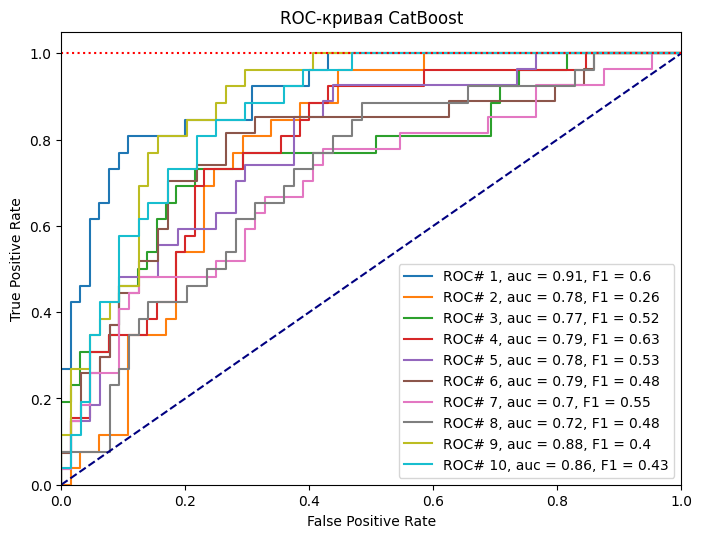

In [180]:

fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls = []

for train_index, test_index in skf.split(X_set, Y_set):
  X_train, Y_train = X_set.loc[train_index], Y_set.loc[train_index]
  X_test, Y_test = X_set.loc[test_index], Y_set.loc[test_index]
  cat.fit(X_train, Y_train)

  #print('CatBoostClassifier: ROC AUC=%.3f' % (lr_auc))
  lr_probs = cat.predict_proba(X_test)
  lr_probs = lr_probs[:, 1]
  lr_auc = roc_auc_score(Y_test, lr_probs)
  fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
  roc_auc = auc(fpr, tpr)
  F_1 = f1_score(Y_test, cat.predict(X_test))

  fpr_ls.append(fpr)
  tpr_ls.append(tpr)
  auc_ls.append(roc_auc)
  F_1_ls.append(F_1)

num = 1

plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая CatBoost')
plt.legend(loc="lower right")
plt.show()

CatBoost: ROC AUC=0.779


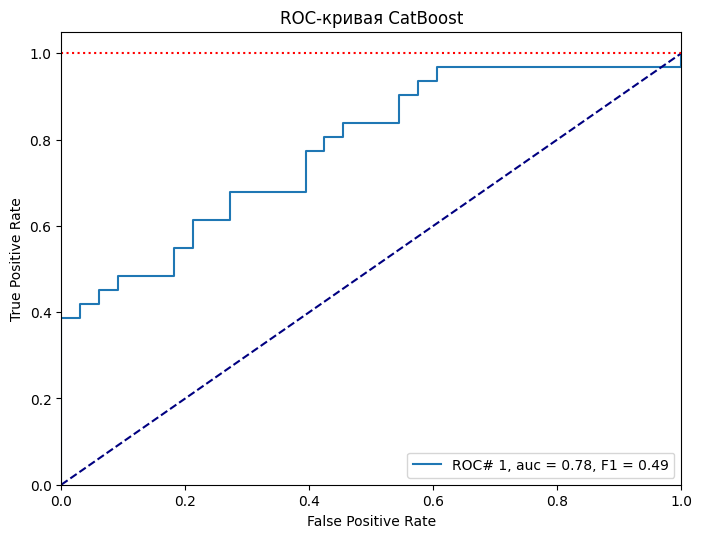

In [181]:
#Оценка по дата сету test_DLS
fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls = []

lr_probs = cat.predict_proba(DLS_X_test_set)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(test_DLS_df["agg?"], lr_probs)
print('CatBoost: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(test_DLS_df["agg?"], lr_probs)
roc_auc = auc(fpr, tpr)
F_1 = f1_score(test_DLS_df["agg?"], cat.predict(DLS_X_test_set))

fpr_ls.append(fpr)
tpr_ls.append(tpr)
auc_ls.append(roc_auc)
F_1_ls.append(F_1)

num = 1

plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая CatBoost')
plt.legend(loc="lower right")
plt.show()

## XGBClassifier

In [182]:
from xgboost import XGBClassifier

In [183]:
xgbc = XGBClassifier()

XGBClassifier: ROC AUC=0.924
XGBClassifier: ROC AUC=0.797
XGBClassifier: ROC AUC=0.749
XGBClassifier: ROC AUC=0.814
XGBClassifier: ROC AUC=0.775
XGBClassifier: ROC AUC=0.778
XGBClassifier: ROC AUC=0.698
XGBClassifier: ROC AUC=0.744
XGBClassifier: ROC AUC=0.901
XGBClassifier: ROC AUC=0.864


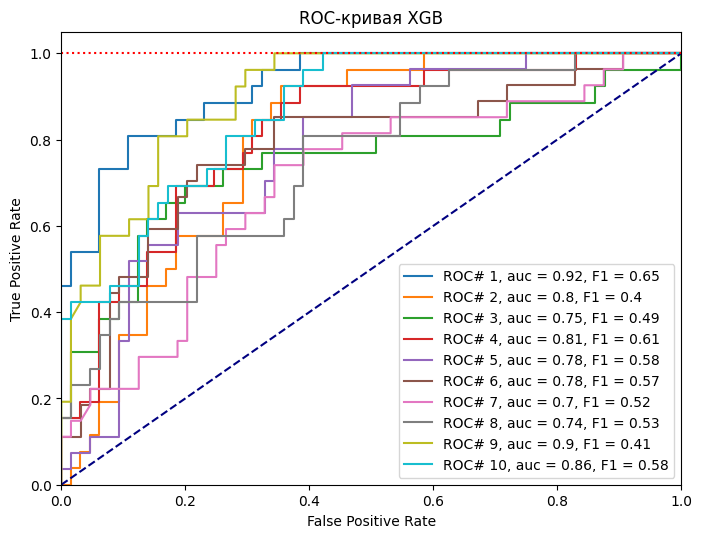

In [187]:


fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls = []

for train_index, test_index in skf.split(X_set, Y_set):
  X_train, Y_train = X_set.loc[train_index], Y_set.loc[train_index]
  X_test, Y_test = X_set.loc[test_index], Y_set.loc[test_index]
  xgbc.fit(X_train, Y_train)

  lr_probs = xgbc.predict_proba(X_test)
  lr_probs = lr_probs[:, 1]
  lr_auc = roc_auc_score(Y_test, lr_probs)
  print('XGBClassifier: ROC AUC=%.3f' % (lr_auc))
  fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
  roc_auc = auc(fpr, tpr)

  F_1 = f1_score(Y_test, xgbc.predict(X_test))

  fpr_ls.append(fpr)
  tpr_ls.append(tpr)
  auc_ls.append(roc_auc)
  F_1_ls.append(F_1)
  
num = 1
plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая XGB')
plt.legend(loc="lower right")
plt.show()

XGBC: ROC AUC=0.777


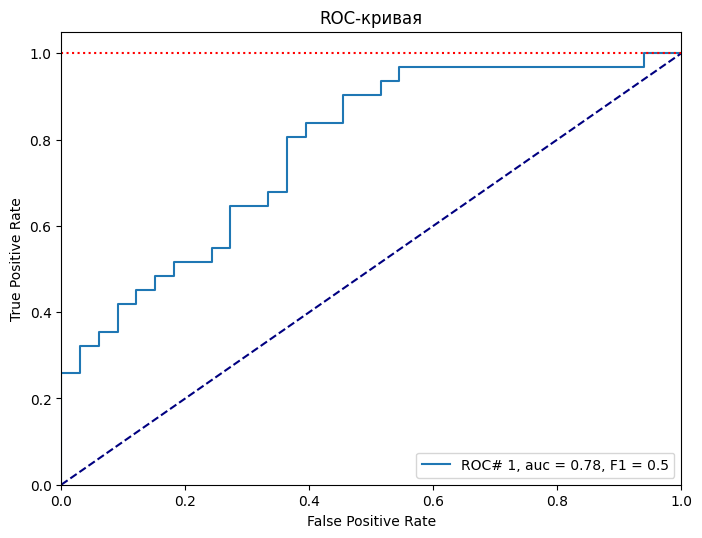

In [188]:
#Оценка по дата сету test_DLS
fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls = []

lr_probs = xgbc.predict_proba(DLS_X_test_set)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(test_DLS_df["agg?"], lr_probs)
print('XGBC: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(test_DLS_df["agg?"], lr_probs)
roc_auc = auc(fpr, tpr)
F_1 = f1_score(test_DLS_df["agg?"], xgbc.predict(DLS_X_test_set))

fpr_ls.append(fpr)
tpr_ls.append(tpr)
auc_ls.append(roc_auc)
F_1_ls.append(F_1)

num = 1

plt.figure(figsize=(8, 6), dpi=100)

for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1
  
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

## LGBMClassifier

In [191]:
from lightgbm import LGBMClassifier

In [192]:
lgb = LGBMClassifier()

LGBMClassifier: ROC AUC=0.896
LGBMClassifier: ROC AUC=0.737
LGBMClassifier: ROC AUC=0.754
LGBMClassifier: ROC AUC=0.763
LGBMClassifier: ROC AUC=0.775
LGBMClassifier: ROC AUC=0.744
LGBMClassifier: ROC AUC=0.690
LGBMClassifier: ROC AUC=0.698
LGBMClassifier: ROC AUC=0.871
LGBMClassifier: ROC AUC=0.833


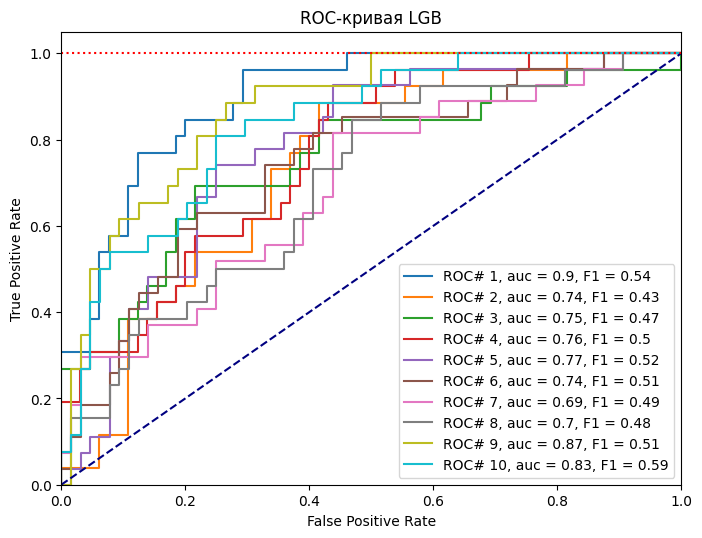

In [193]:

fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls = []

for train_index, test_index in skf.split(X_set, Y_set):
  X_train, Y_train = X_set.loc[train_index], Y_set.loc[train_index]
  X_test, Y_test = X_set.loc[test_index], Y_set.loc[test_index]
  lgb.fit(X_train, Y_train)

  lr_probs = lgb.predict_proba(X_test)
  lr_probs = lr_probs[:, 1]
  lr_auc = roc_auc_score(Y_test, lr_probs)
  print('LGBMClassifier: ROC AUC=%.3f' % (lr_auc))
  fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
  roc_auc = auc(fpr, tpr)
  F_1 = f1_score(Y_test, lgb.predict(X_test))

  fpr_ls.append(fpr)
  tpr_ls.append(tpr)
  auc_ls.append(roc_auc)
  F_1_ls.append(F_1)
  
num = 1
plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая LGB')
plt.legend(loc="lower right")
plt.show()

LGBM: ROC AUC=0.794


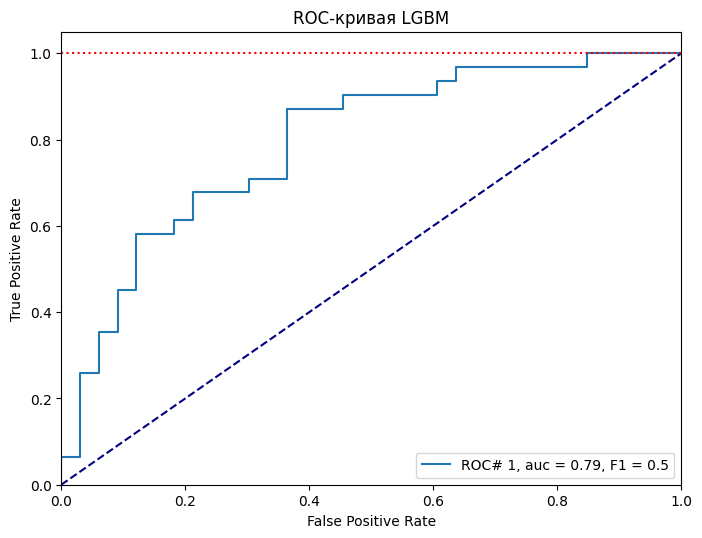

In [195]:
#Оценка по дата сету test_DLS
fpr_ls = []
tpr_ls = []
auc_ls = []
F_1_ls  = []

lr_probs = lgb.predict_proba(DLS_X_test_set)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(test_DLS_df["agg?"], lr_probs)
print('LGBM: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(test_DLS_df["agg?"], lr_probs)
roc_auc = auc(fpr, tpr)
F_1 = f1_score(test_DLS_df["agg?"], lgb.predict(DLS_X_test_set))

fpr_ls.append(fpr)
tpr_ls.append(tpr)
auc_ls.append(roc_auc)
F_1_ls.append(F_1)

num = 1

plt.figure(figsize=(8, 6), dpi=100)
for i,j,n,z in zip(fpr_ls, tpr_ls, auc_ls, F_1_ls):
  plt.plot(i, j, 
         label=f"ROC# {num}, auc = {round(n,2)}, F1 = {round(z,2)}")
  num +=1
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.axhline(y=1,color='red', linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая LGBM')
plt.legend(loc="lower right")
plt.show()